In [ ]:
#install
!pip install pandas
!pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.9 MB/s eta 0:00:00


In [ ]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801'

# seaborn plot style
sns.set_style('darkgrid')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/worldwide covid data.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      221 non-null    object 
 1   Total Cases        221 non-null    int64  
 2   Total Deaths       221 non-null    int64  
 3   Total Recovered    201 non-null    float64
 4   Active Cases       201 non-null    float64
 5   Tot Cases/ 1M pop  221 non-null    int64  
 6   Deaths/ 1M pop     221 non-null    int64  
 7   Total Tests        211 non-null    float64
 8   Tests/ 1M pop      211 non-null    float64
 9   Population         221 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 17.4+ KB
None


**Preprocessing**

In [ ]:
print("Columns having NULLS\n\n")
df.isnull().sum()

Columns having NULLS




Country/Other         0
Total Cases           0
Total Deaths          0
Total Recovered      20
Active Cases         20
Tot Cases/ 1M pop     0
Deaths/ 1M pop        0
Total Tests          10
Tests/ 1M pop        10
Population            0
dtype: int64

In [ ]:
df[(df['Total Tests'].isnull())|(df['Tests/ 1M pop'].isnull())
           |(df['Total Recovered'].isnull())|(df['Active Cases'].isnull())]

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
27,British Virgin Islands,7305,64,NaN,NaN,238757,2092,107339.0,3508269.0,30596
44,Comoros,9109,161,8939.0,9.0,10038,177,NaN,NaN,907419
53,DPRK,4772813,74,4772739.0,0.0,183636,3,NaN,NaN,25990679
67,Faeroe Islands,34658,28,NaN,NaN,703959,569,778000.0,15802409.0,49233
72,French Polynesia,78623,649,NaN,NaN,276682,2284,NaN,NaN,284164
82,Guadeloupe,203235,1021,NaN,NaN,508349,2554,938039.0,2346306.0,399794
88,Honduras,473547,11161,NaN,NaN,46330,1092,1660662.0,162472.0,10221247
91,Iceland,209191,229,NaN,NaN,605661,663,1996384.0,5780036.0,345393
97,Isle of Man,38008,116,NaN,NaN,443335,1353,150753.0,1758422.0,85732
102,Japan,33803572,74694,NaN,NaN,269169,595,100414883.0,799578.0,125584838


In [ ]:

for col in df.columns:
    if df[col].isnull().sum() > 0:
        skewness = df[col].skew()
        print(col,skewness)
        if skewness > 1 or skewness < -1:
            df[col].fillna(df[col].median(), inplace=True)

        elif (skewness >= 0.5 and skewness <= 1) or (skewness >= -1 and skewness <= -0.5):
            df[col].fillna(df[col].mean(), inplace=True)

        else:
            df[col].fillna(df[col].mean(), inplace=True)

print(df)


Total Recovered 6.808316744188435
Active Cases 5.839472772465587
Total Tests 6.942131057946363
Tests/ 1M pop 3.4980321375709384
         Country/Other  Total Cases  Total Deaths  Total Recovered  \
0          Afghanistan       225659          7946         206248.0   
1              Albania       334726          3602         329428.0   
2              Algeria       271852          6881         183061.0   
3              Andorra        48015           165          47563.0   
4               Angola       105384          1934         103419.0   
..                 ...          ...           ...              ...   
216            Vietnam     11623288         43206       10640663.0   
217  Wallis and Futuna         3550             8            438.0   
218              Yemen        11945          2159           9124.0   
219             Zambia       349287          4069         341316.0   
220           Zimbabwe       265737          5717         258888.0   

     Active Cases  Tot Cases/ 1

In [ ]:
# Compute basic descriptive statistics for each column
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
descriptive_stats.transpose()


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Total Cases,221.0,3.145876e+06,1.001666e+07,3452.0,34306.0,233417.0,1411831.0,1.083867e+08
Total Deaths,221.0,3.129005e+04,1.089697e+05,1.0,229.0,2349.0,16297.0,1.174847e+06
Total Recovered,221.0,2.858650e+06,9.582110e+06,438.0,39216.0,259953.0,1313009.0,1.061579e+08
Active Cases,221.0,3.301200e+04,1.386754e+05,0.0,81.0,957.0,7500.0,1.064490e+06
Tot Cases/ 1M pop,221.0,1.975393e+05,2.010038e+05,347.0,17940.0,124048.0,323256.0,7.189090e+05
Deaths/ 1M pop,221.0,1.273036e+03,1.301681e+03,3.0,177.0,869.0,2087.0,6.595000e+03
Total Tests,221.0,3.187720e+07,1.177047e+08,7850.0,401622.0,2303734.0,13001033.0,1.186121e+09
Tests/ 1M pop,221.0,2.077050e+06,3.582694e+06,5093.0,202936.0,867342.0,2179850.0,2.330212e+07
Population,221.0,3.594696e+07,1.409756e+08,5759.0,642371.0,6684849.0,25990679.0,1.448471e+09


In [ ]:
print("Before Dropping Duplicates : ",df.shape,'\n')
df=df.drop_duplicates()
print("\nAfter Dropping Duplicates : ",df.shape)

Before Dropping Duplicates :  (221, 10) 


After Dropping Duplicates :  (221, 10)


**Finding outliers**

In [ ]:
import pandas as pd
from scipy import stats

columns_of_interest = [
    'Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
    'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population'
]

# Calculate Z-scores for each column
z_scores = stats.zscore(df[columns_of_interest])

# Define a threshold for considering Z-scores as outliers (e.g., 2 or -2)
threshold = 3

# Create a DataFrame to store the outliers
outliers_df = pd.DataFrame((z_scores > threshold) | (z_scores < -threshold), columns=columns_of_interest)

# Count the number of outliers in each column
outliers_count = outliers_df.sum()

# Display the count of outliers for each column
print("Outliers Count:")
print(outliers_count)

# Display the rows with outliers for investigation
outliers_rows = df[outliers_df.any(axis=1)]
print("\nRows with Outliers:")
print(outliers_rows)


Outliers Count:
Total Cases          7
Total Deaths         4
Total Recovered      6
Active Cases         4
Tot Cases/ 1M pop    0
Deaths/ 1M pop       2
Total Tests          4
Tests/ 1M pop        7
Population           2
dtype: int64

Rows with Outliers:
        Country/Other  Total Cases  Total Deaths  Total Recovered  \
11            Austria      6081287         22542        6054934.0   
21            Bermuda        18860           165          18685.0   
26             Brazil     37789040        705313       36249161.0   
29           Bulgaria      1311707         38456        1271187.0   
42              China       503302          5272         379053.0   
55            Denmark      3183756          8814        3174422.0   
67     Faeroe Islands        34658            28         259953.0   
70             France     40138560        167642       39970918.0   
76            Germany     38428685        174352       38240600.0   
78          Gibraltar        20550           113     

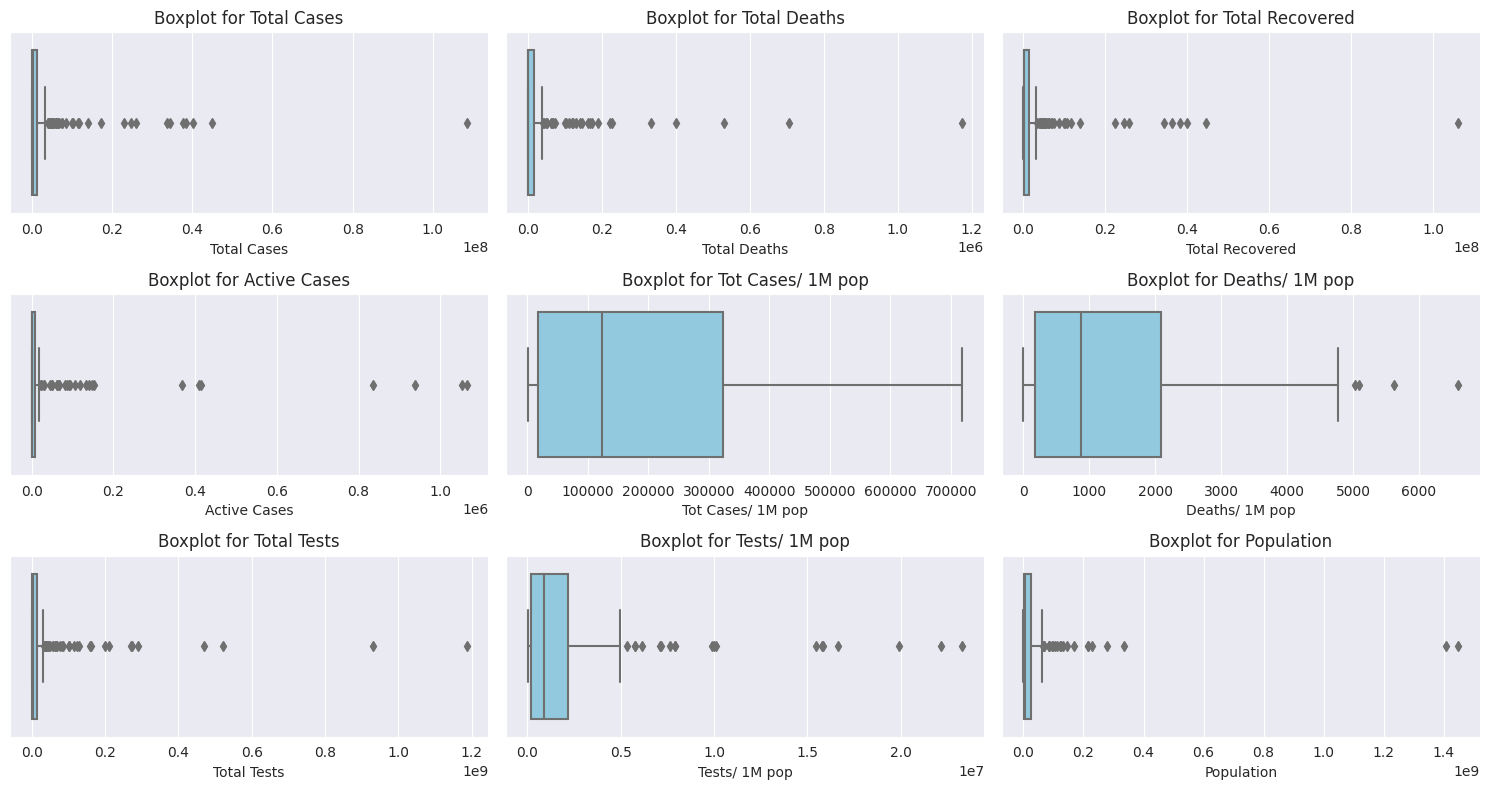

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = [
    'Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
    'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population'
]

# Plot boxplots for each column
plt.figure(figsize=(15, 8))
#sns.set(style="whitegrid")

for i, column in enumerate(columns_of_interest):
    plt.subplot(3, 3, i + 1)
    ax = sns.boxplot(x=df[column], color='skyblue')

    # Add title for each subplot
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


**Probability distribution**

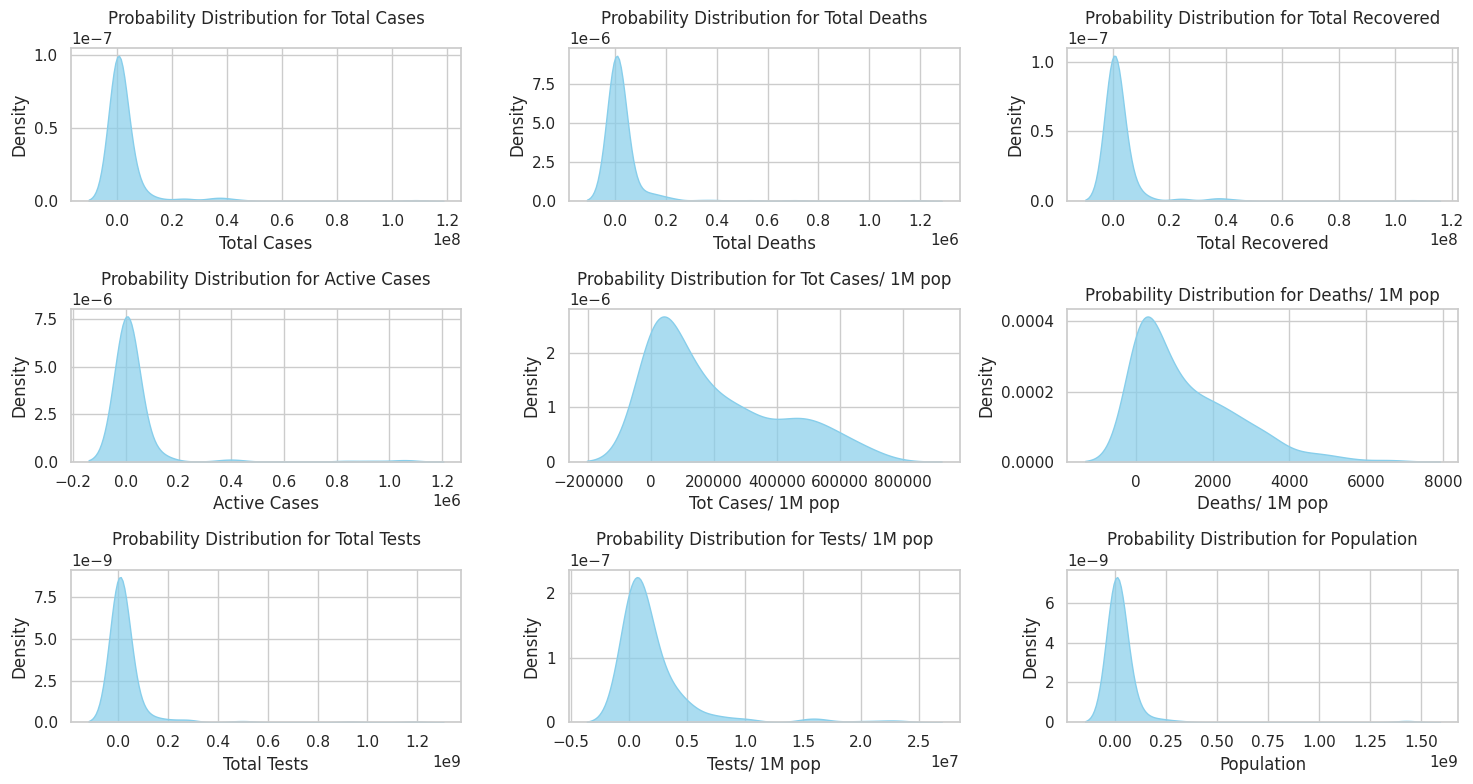

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the relevant columns are 'Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
# 'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop', 'Population'

columns_of_interest = [
    'Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
    'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population'
]

# Plot probability distribution (KDE) for each column
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

for i, column in enumerate(columns_of_interest):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(df[column], fill=True, color='skyblue', alpha=0.7)

    # Add title for each subplot
    plt.title(f'Probability Distribution for {column}')

plt.tight_layout()
plt.show()


**Top 20 countries with most confirmed cases**

In [ ]:
#Confirmed Cases
fig = px.bar(df.sort_values('Total Cases', ascending=False)[:20][::-1],
             x='Total Cases', y='Country/Other',color_discrete_sequence=[cnf],
             title='Confirmed Cases Worldwide', text='Total Cases', height=1000, orientation='h')
fig.show(renderer='colab')

**Top 20 countries with most deaths**

In [ ]:
#Total Deaths
fig = px.bar(df.sort_values('Total Deaths', ascending=False)[:20][::-1],
             x='Total Deaths', y='Country/Other',color_discrete_sequence=['#D63230'],
             title='Total Deaths Worldwide', text='Total Deaths', height=1000, orientation='h')
fig.show(renderer='colab')

**Top 20 countries with most active cases**

In [ ]:
#Active Cases
fig = px.bar(df.sort_values('Active Cases', ascending=False)[:20][::-1],
             x='Active Cases', y='Country/Other',color_discrete_sequence=['#84DCC6'],
             title='Active Cases Worldwide', text='Active Cases', height=1000, orientation='h')
fig.show(renderer='colab')

**Top 20 countries with most recovered cases**

In [ ]:
#Total Recovered
fig = px.bar(df.sort_values('Total Recovered', ascending=False)[:20][::-1],
             x='Total Recovered', y='Country/Other',
             title='Recovered Cases Worldwide', text='Total Recovered', height=1000, orientation='h')
fig.show(renderer='colab')

**Top 20 countries with most tests conducted**

In [ ]:
#Total Tests
fig = px.bar(df.sort_values('Total Tests', ascending=False)[:20][::-1],
             x='Total Tests', y='Country/Other',
             title='Total Tests Worldwide', text='Total Tests', height=1000, orientation='h')
fig.show(renderer='colab')

**Map Visualization**

In [ ]:
# Create a choropleth map for Total Cases
fig_cases = px.choropleth(df,
                          locations="Country/Other",
                          locationmode="country names",
                          color="Total Cases",
                          title="Total Confirmed Cases Distribution",
                          color_continuous_scale=px.colors.sequential.Plasma)

fig_cases.update_geos(projection_type="natural earth")

# Create a choropleth map for Total Deaths
fig_deaths = px.choropleth(df,
                           locations="Country/Other",
                           locationmode="country names",
                           color="Total Deaths",
                           title="Total Deaths Distribution",
                           color_continuous_scale=px.colors.sequential.Plasma)

fig_deaths.update_geos(projection_type="natural earth")

# Create a choropleth map for Total Recovered
fig_recovered = px.choropleth(df,
                              locations="Country/Other",
                              locationmode="country names",
                              color="Total Recovered",
                              title="Total Recovered Distribution",
                              color_continuous_scale=px.colors.sequential.Plasma)

fig_recovered.update_geos(projection_type="natural earth")

# Create a choropleth map for Total Active Cases
fig_active = px.choropleth(df,
                              locations="Country/Other",
                              locationmode="country names",
                              color="Active Cases",
                              title="Total Active Cases Distribution",
                              color_continuous_scale=px.colors.sequential.Plasma)

fig_active.update_geos(projection_type="natural earth")

# Show the figures
fig_cases.show(renderer='colab')
fig_deaths.show(renderer='colab')
fig_recovered.show(renderer='colab')
fig_active.show(renderer='colab')

**Countries where there are no active Cases**

In [ ]:
temp = df[df['Active Cases']==0]
temp = temp.sort_values('Total Cases', ascending=False)
temp.reset_index(drop=True)

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,France,40138560,167642,39970918.0,0.0,612013,2556,271490188.0,4139547.0,65584518
1,Taiwan,10241520,19005,10222515.0,0.0,428720,796,30742304.0,1286903.0,23888595
2,Greece,6101379,37089,6064290.0,0.0,591412,3595,102228365.0,9909078.0,10316637
3,Ukraine,5557995,112418,5445577.0,0.0,128681,2603,32603805.0,754855.0,43192122
4,DPRK,4772813,74,4772739.0,0.0,183636,3,2303734.0,867342.0,25990679
5,Ecuador,1069114,36042,1033072.0,0.0,59024,1990,3082403.0,170173.0,18113361
6,Mongolia,1010975,2179,1008796.0,0.0,299275,645,4030048.0,1193000.0,3378078
7,Cyprus,660854,1364,659490.0,0.0,540184,1115,9640118.0,7879860.0,1223387
8,Cambodia,138940,3056,135884.0,0.0,8093,178,3091420.0,180062.0,17168639
9,Sudan,63993,5046,58947.0,0.0,1391,110,562941.0,12240.0,45992020


**Lockdown?**

In [ ]:
# Which country must, may and avoid imposing lockdowns ?
# Considering Lockdown is imposed when Active Cases/Population >0.1
df['Active Cases / Population']=[round(df['Active Cases'][i]/df['Population'][i],4) for i in range(len(df))]
fig = px.scatter(
    df,
    x='Country/Other',
    y='Active Cases / Population',
    color_discrete_map={'Lockdown': 'red', 'Possible Lockdown': 'yellow', 'No Lockdown': 'green'},
    color=df['Active Cases / Population'].apply(
        lambda x: 'Lockdown' if x > 0.1 else ('Possible Lockdown' if 0.001 <= x <= 0.1 else 'No Lockdown')
    ),
    labels={'Active Cases / Population': 'Active Cases / Population'},
    title='Lockdown Categories by Country',
)

fig.show(renderer='colab')

After analysing, countries shown in green colour requires no lockdown, countries in yellow colour requires possible lockdown and the countries with red colour are those where it is necessary for a lockdown.

In [ ]:
# Filter countries for Lockdown and Possible Lockdown
lockdown_countries = df[df['Active Cases / Population'] > 0.1]['Country/Other']
possible_lockdown_countries = df[(df['Active Cases / Population'] >= 0.001) & (df['Active Cases / Population'] <= 0.1)]['Country/Other']

# Display the lists of countries
print("Countries for Lockdown:")
print(lockdown_countries.tolist())

print("\nCountries for Possible Lockdown:")
print(possible_lockdown_countries.tolist())


Countries for Lockdown:
['Brunei', 'Cayman Islands', 'French Guiana', 'Gibraltar', 'Greenland', 'Saint Martin', 'Saint Pierre Miquelon', 'Wallis and Futuna']

Countries for Possible Lockdown:
['Algeria', 'Andorra', 'Armenia', 'Aruba', 'Bahamas', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'British Virgin Islands', 'Caribbean Netherlands', 'Channel Islands', 'Costa Rica', 'Curaçao', 'Dominican Republic', 'El Salvador', 'Estonia', 'Faeroe Islands', 'Fiji', 'French Polynesia', 'Georgia', 'Guadeloupe', 'Iceland', 'Iran', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Kiribati', 'Kyrgyzstan', 'Lebanon', 'Lesotho', 'Luxembourg', 'Macao', 'Maldives', 'Malta', 'Martinique', 'Mayotte', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Nauru', 'Nicaragua', 'Oman', 'Poland', 'Russia', 'Réunion', 'S. Korea', 'Saint Lucia', 'Samoa', 'San Marino', 'Singapore', 'Sint Maarten', 'Solomon Islands', 'South Africa', 'St. Barth', 'Suriname', 'Tonga', 'UAE', 'USA', 'Uganda', 'Vietnam']


**Correlation**

<Axes: >

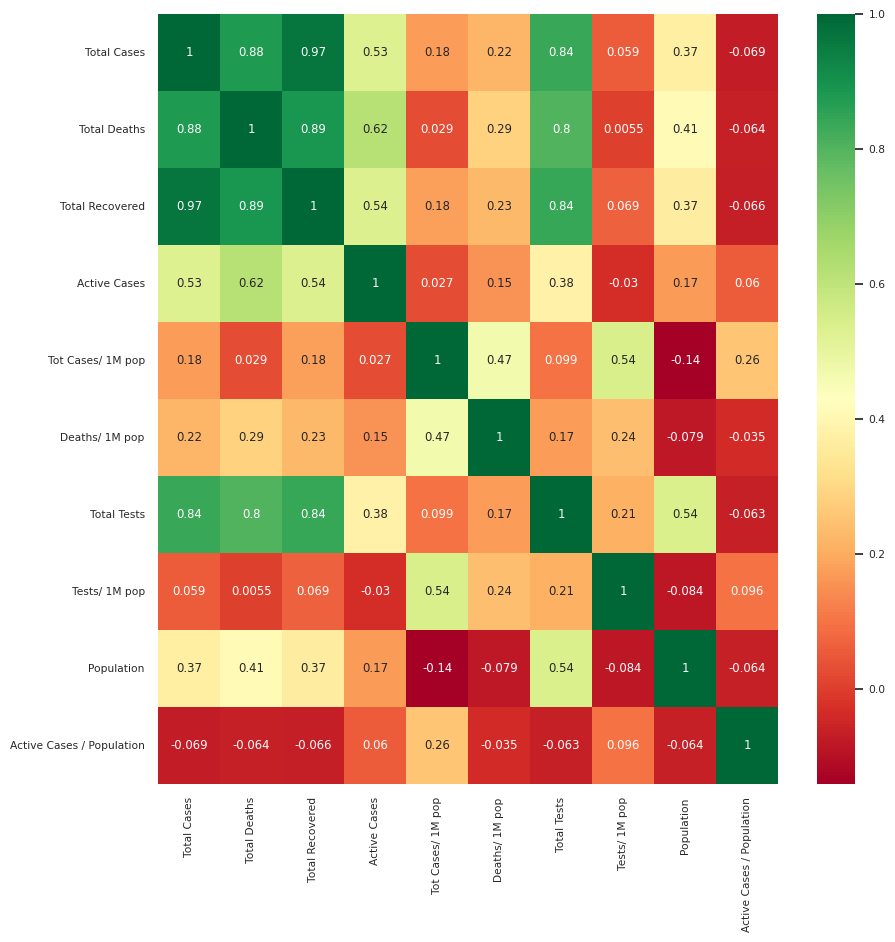

In [ ]:
#Correlation between different variables
plt.figure(figsize = (10,10))
sns.set(font_scale=0.7)
sns.heatmap(df.corr(),cmap="RdYlGn",annot=True)

**Mortality and Recovery Rate**

In [ ]:
#Mortality and Recovery Rate
country = df.groupby('Country/Other')['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases'].sum().reset_index()
country['Mortality Rate'] = round((country['Total Deaths'] / country['Total Cases']) * 100, 2)
country['Recovery Rate'] = round((country['Total Recovered'] / country['Total Cases']) * 100,2)
def plot_hbar(col):
    fig = px.bar(country.sort_values(col),
                 x=col, y="Country/Other", color='Country/Other',
                 text=col, orientation='h', width=700 ,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="",
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show(renderer='colab')
plot_hbar('Mortality Rate')
plot_hbar('Recovery Rate')

In [ ]:
import plotly.express as px

fig = px.treemap(country, path=['Country/Other'], values='Total Cases',
                 color='Mortality Rate', hover_data=['Recovery Rate'],
                 color_continuous_scale='reds',
                 title="Mortality Rate and Total Cases by Country")

fig.show(renderer='colab')


In [ ]:
# Filter countries based on conditions
high_mortality_countries = country[country['Mortality Rate'] > 5]['Country/Other']
low_recovery_countries = country[country['Recovery Rate'] < 80]['Country/Other']
both_conditions_countries = country[(country['Mortality Rate'] > 5) & (country['Recovery Rate'] < 80)]['Country/Other']

# Display the lists of countries
print("Countries with Mortality Rate > 5%:")
print(high_mortality_countries.tolist())

print("\nCountries with Recovery Rate < 80%:")
print(low_recovery_countries.tolist())

print("\nCountries with Both Conditions (Mortality Rate > 5% and Recovery Rate < 80%):")
print(both_conditions_countries.tolist())


Countries with Mortality Rate > 5%:
['Sudan', 'Syria', 'Yemen']

Countries with Recovery Rate < 80%:
['Algeria', 'Brunei', 'Cayman Islands', 'Chad', 'China', 'Costa Rica', 'French Guiana', 'Greenland', 'Honduras', 'Jamaica', 'Japan', 'Kiribati', 'Lesotho', 'Macao', 'Nicaragua', 'Paraguay', 'Saint Martin', 'Saint Pierre Miquelon', 'Samoa', 'Somalia', 'Tunisia', 'Turkey', 'Uganda', 'Wallis and Futuna', 'Yemen']

Countries with Both Conditions (Mortality Rate > 5% and Recovery Rate < 80%):
['Yemen']


**Testing Rate**

In [ ]:
# Create 'Testing Rate' column
df['Testing Rate'] = df['Tests/ 1M pop'].apply(lambda x: 'Faster' if x > 2000000 else ('Slower' if x < 1000000 else 'At Par'))

# Visualize
fig = px.bar(
    df,
    x='Country/Other',
    y='Tests/ 1M pop',
    color='Testing Rate',
    color_discrete_map={'Faster': 'red', 'Slower': 'blue', 'At Par': 'green'},
    title='Testing Rate According to (Tests/1M Population)',
)

fig.show(renderer='colab')


In [ ]:
# Filter countries for slower testing rates
slower_testing_countries = df[df['Tests/ 1M pop'] < 1000000]['Country/Other']

# Display the list of countries
print("Countries with Slower Testing Rates:")
print(slower_testing_countries.tolist())


Countries with Slower Testing Rates:
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'CAR', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'DPRK', 'DRC', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'French Polynesia', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ivory Coast', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Macao', 'Madagascar', 'Malawi', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia', 'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'New Cal

As depicted by the image, where there are slower testing rates, those countries need more attention towards building new testing centres and buying more test-kits. And the countries having faster testing rates, are in good conditions.

**Linear Regression Analysis**

In [ ]:
target = ['Deaths/ 1M pop']
predictors = list(set(list(df.columns))-set(target))
predictors

['Tests/ 1M pop',
 'Total Tests',
 'Population',
 'Total Cases',
 'Total Deaths',
 'Total Recovered',
 'Tot Cases/ 1M pop',
 'Active Cases / Population',
 'Country/Other',
 'Active Cases',
 'Testing Rate']

In [ ]:
research = predictors[:]
research.remove('Country/Other')
research.remove('Testing Rate')
print(research)

['Tests/ 1M pop', 'Total Tests', 'Population', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Tot Cases/ 1M pop', 'Active Cases / Population', 'Active Cases']


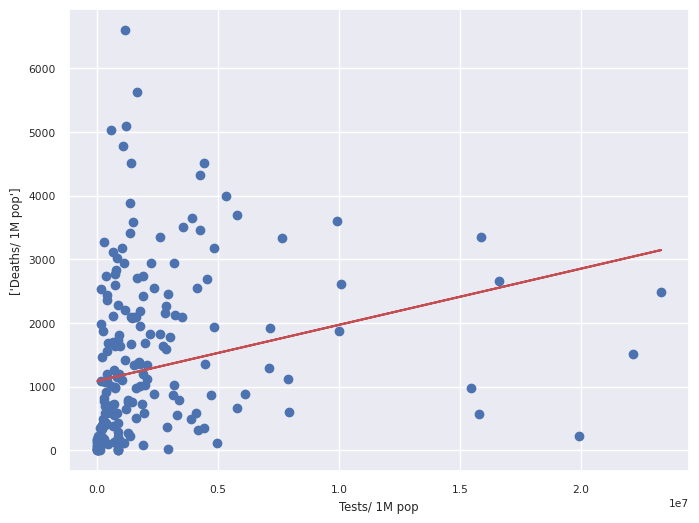

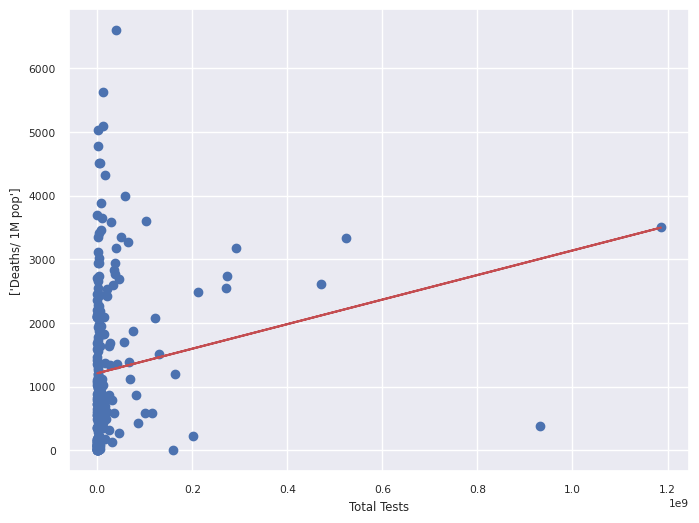

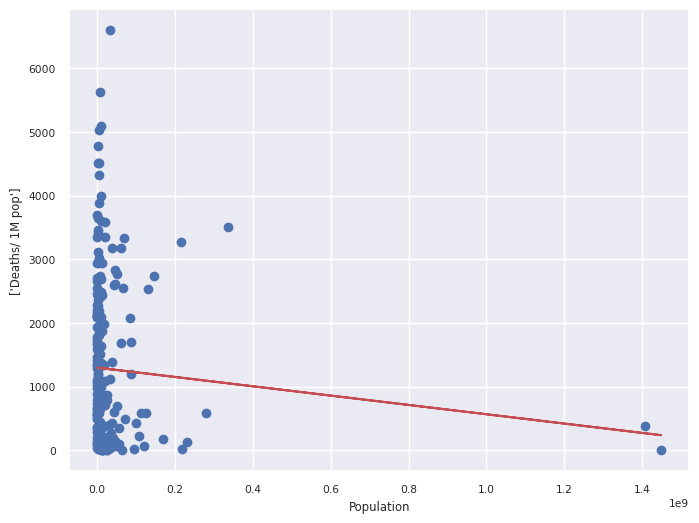

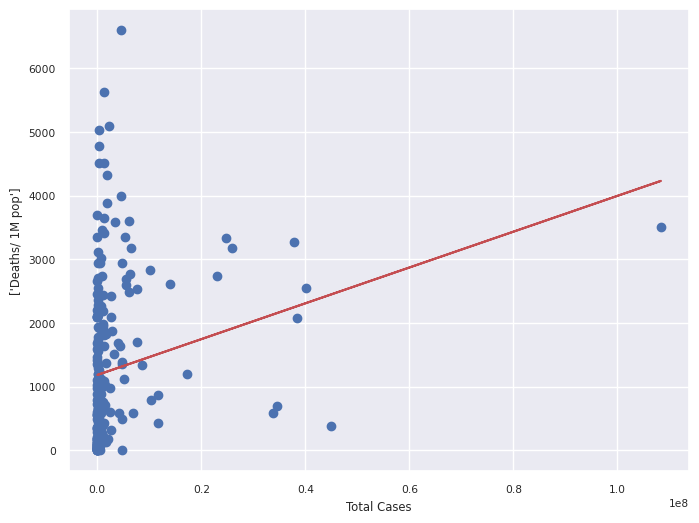

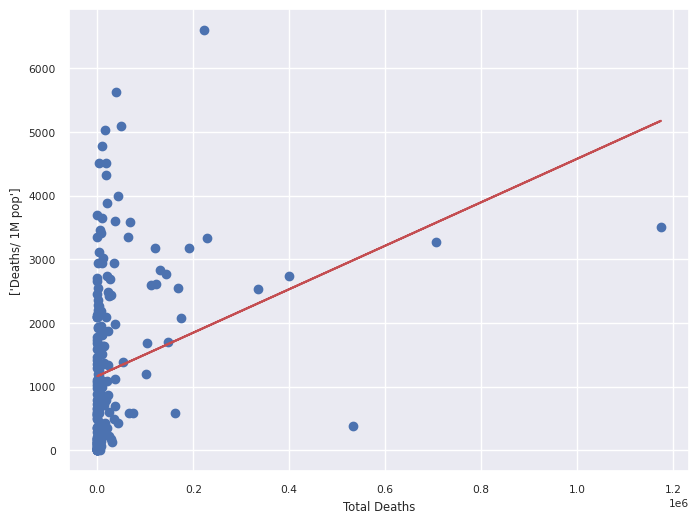

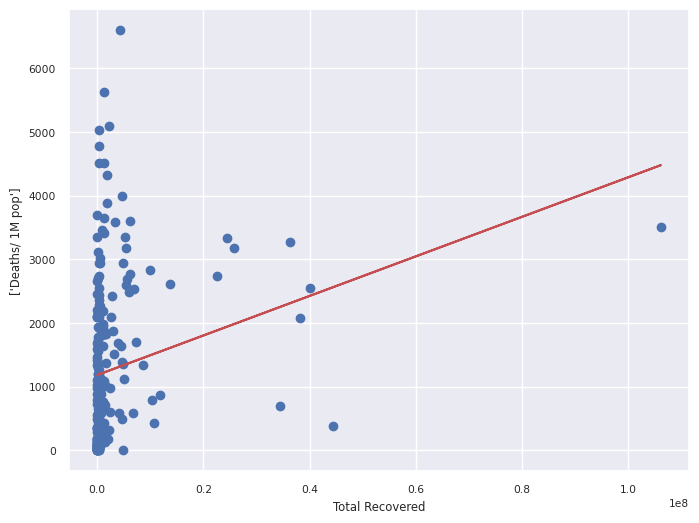

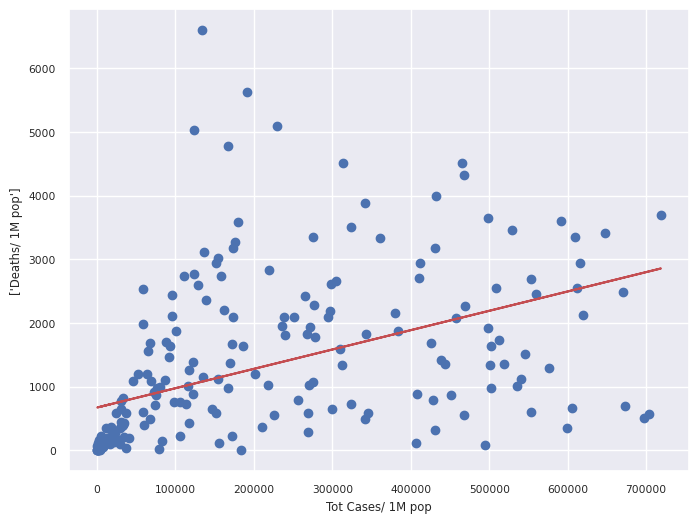

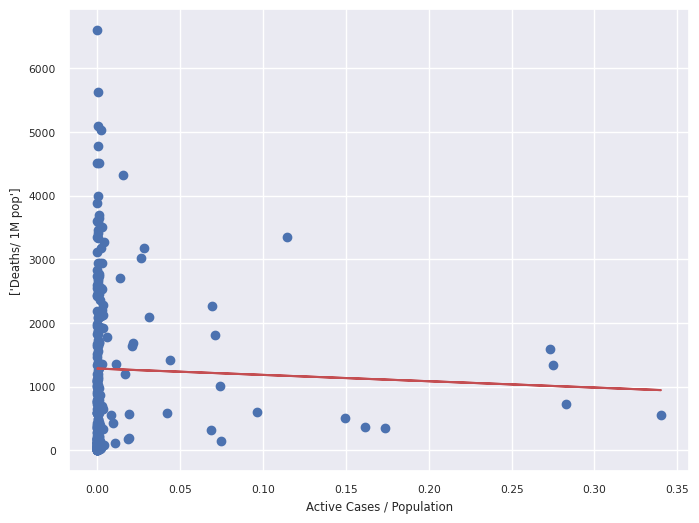

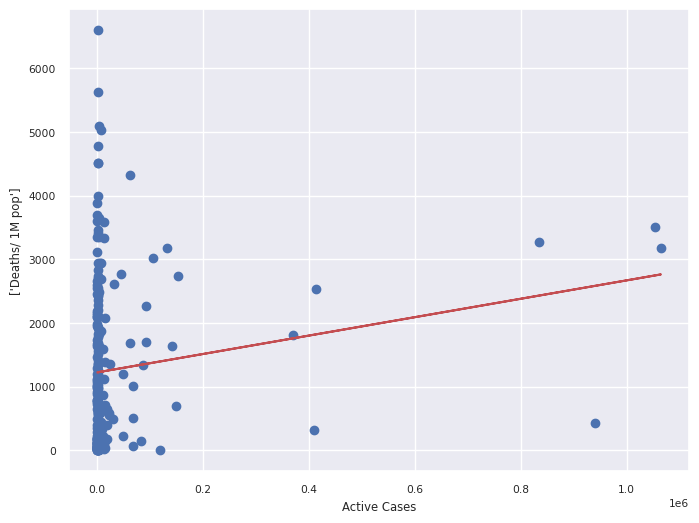

In [ ]:
from sklearn import linear_model

for el in research:
    plt.figure(figsize=(8, 6))
    sl_regr = linear_model.LinearRegression()

    train_x = np.asanyarray(df[[el]])
    train_y = np.asanyarray(df[target])
    sl_regr.fit(train_x, train_y)

    plt.scatter(df[[el]], df[target])
    plt.plot(train_x, sl_regr.coef_[0]*train_x + sl_regr.intercept_, '-r')

    plt.xlabel(el)
    plt.ylabel(target)
    plt.show()

**Hypothesis Testing**

Hypothesis: There is a significant difference in the mean total cases between countries with high and low population.

Null Hypothesis (H0): The mean total cases for high population  countries are equal to the mean total cases for low population countries.
Alternative Hypothesis (H1): The mean total cases for high population countries are different from the mean total cases for low population countries.

In [ ]:
from scipy.stats import ttest_ind

# Assuming you have already calculated the cases_per_million as in the previous code
high_density = df[df['Population'] > df['Population'].median()]
low_density = df[df['Population'] <= df['Population'].median()]

t_stat, p_value = ttest_ind(high_density['Total Cases'], low_density['Total Cases'], equal_var=False)

print(f'T-test Statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean total cases between high and low population countries.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.")


T-test Statistic: 4.311567108043055
P-value: 3.561008450276667e-05
Reject the null hypothesis. There is a significant difference in mean total cases between high and low population countries.


Null Hypothesis (H0): There is no significant correlation between the total number of COVID-19 cases (Total Cases) and the total number of tests conducted (Total Tests) per million population.

Alternative Hypothesis (H1): There is a significant positive correlation between the total number of COVID-19 cases and the total number of tests conducted per million population.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr


# Select relevant columns for the analysis
columns_of_interest = ['Total Cases', 'Total Tests', 'Tot Cases/ 1M pop']

# Create a new DataFrame with only the selected columns
selected_data = df[columns_of_interest]

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(selected_data['Total Cases'], selected_data['Total Tests'])

# Output the results
print(f"Correlation Coefficient between Total Cases and Total Tests: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Determine whether to reject the null hypothesis
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")


Correlation Coefficient between Total Cases and Total Tests: 0.8361852771597383
P-value: 4.7706899034809485e-59
Reject the null hypothesis: There is a significant correlation.


Hypothesis: Deaths and Cases

Null Hypothesis (H0): The total number of deaths (Total Deaths) is not correlated with the total number of COVID-19 cases (Total Cases).
Alternative Hypothesis (H1): There is a significant correlation between the total number of deaths and the total number of COVID-19 cases. write the code for this

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting relevant columns
total_deaths = df['Total Deaths']
total_cases = df['Total Cases']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(total_deaths, total_cases)

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Hypothesis Testing Conclusion
alpha = 0.05  # significance level

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between Total Deaths and Total Cases.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence of a significant correlation.")


Pearson Correlation Coefficient: 0.8795266160802461
P-value: 1.4199888608996799e-72
Reject the null hypothesis. There is a significant correlation between Total Deaths and Total Cases.


**Covid-19 in India**

In [ ]:
#Load Dataset
india_data = pd.read_csv('/content/Latest Covid-19 India Status.csv')
print("Dataset Overview:")
print(india_data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB
None


In [ ]:
# Compute basic descriptive statistics for each column
descriptive_stat = india_data.describe()
print("\nDescriptive Statistics:")
descriptive_stat.transpose()


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Total Cases,36.0,1.249975e+06,1.846038e+06,10766.00,106543.00,6.140910e+05,1331951.00,8.171048e+06
Active,36.0,5.033333e+01,2.071180e+02,0.00,0.00,1.500000e+00,9.00,1.233000e+03
Discharged,36.0,1.235146e+06,1.820328e+06,10637.00,105539.50,6.076750e+05,1322329.00,8.022276e+06
Deaths,36.0,1.477853e+04,2.722114e+04,4.00,1124.25,6.551000e+03,14325.75,1.485580e+05
Active Ratio,36.0,5.000000e-03,2.667262e-02,0.00,0.00,0.000000e+00,0.00,1.600000e-01
Discharge Ratio,36.0,9.889722e+01,5.068537e-01,97.41,98.69,9.893500e+01,99.16,9.997000e+01
Death Ratio,36.0,1.097778e+00,4.947906e-01,0.03,0.84,1.065000e+00,1.31,2.440000e+00
Population,36.0,3.971861e+07,5.050913e+07,66001.00,1695472.75,2.410088e+07,69799859.75,2.315026e+08


**Visualization of condition**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Melt the DataFrame to make it suitable for plotting
melted_data = pd.melt(india_data, id_vars=['State/UTs'], value_vars=['Total Cases', 'Active', 'Discharged', 'Deaths'])

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=['Total Cases', 'Active Cases', 'Discharged Cases', 'Deaths'])

# Add traces for each subplot
for i, column in enumerate(['Total Cases', 'Active', 'Discharged', 'Deaths']):
    trace = go.Bar(x=melted_data['State/UTs'], y=melted_data['value'][melted_data['variable'] == column], name=column)
    row = 1 if i < 2 else 2
    col = i % 2 + 1
    fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(height=800, width=1000, title_text="COVID-19 Statistics by State/UTs")

# Show the plot
fig.show(renderer='colab')


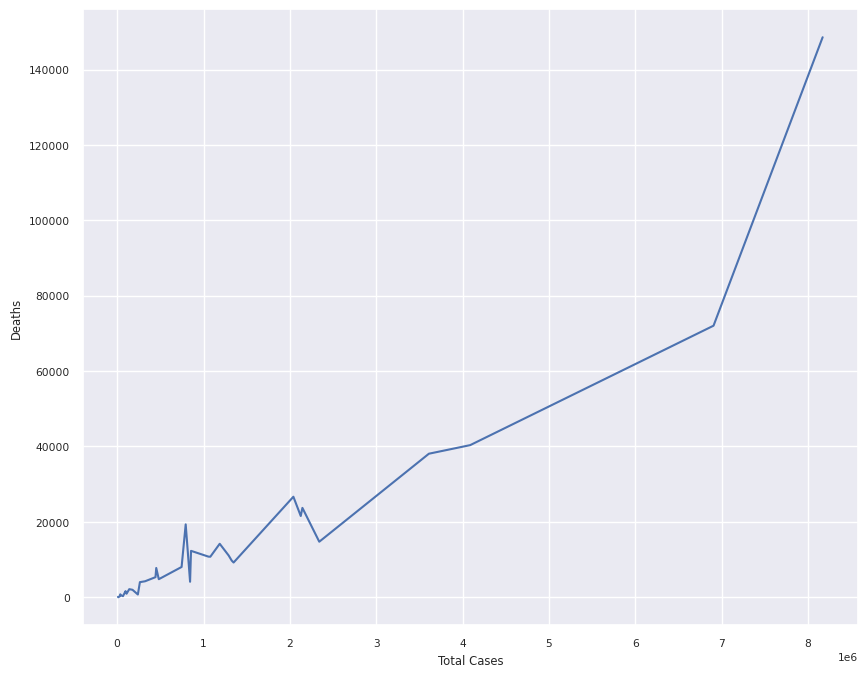

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Total Cases',y='Deaths',data=india_data)
plt.show()

**Death, Recovered, Active Ratio**

In [ ]:
import plotly.express as px

# Death Ratio
fig_death = px.bar(india_data,
                   x='Death Ratio',
                   y='State/UTs',
                   orientation='h',
                   color='State/UTs',
                   title='Death Ratio by State/UTs')

# Discharge Ratio
fig_discharge = px.bar(india_data,
                      x='Discharge Ratio',
                      y='State/UTs',
                      orientation='h',
                      color='State/UTs',
                      title='Discharge Ratio by State/UTs')

# Active Ratio
fig_active = px.bar(india_data,
                   x='Active Ratio',
                   y='State/UTs',
                   orientation='h',
                   color='State/UTs',
                   title='Active Ratio by State/UTs')

# Show the figures
fig_death.show(renderer='colab')
fig_discharge.show(renderer='colab')
fig_active.show(renderer='colab')


**Correlation**

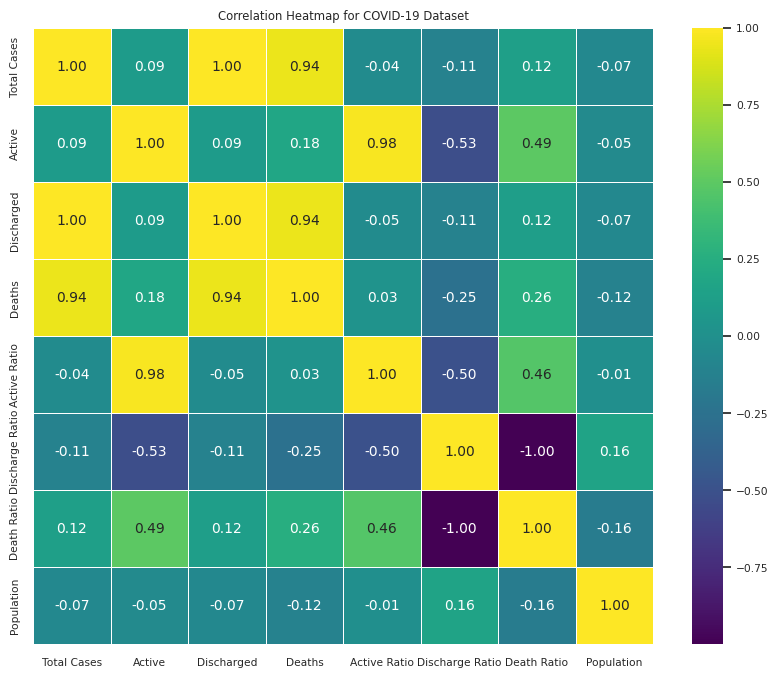

In [ ]:
# Extract numerical columns for correlation
numerical_columns = india_data[['Total Cases', 'Active', 'Discharged', 'Deaths', 'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population']]

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap with custom color map and size of correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for COVID-19 Dataset')
plt.show()

**COVID-19 India Statewise Vaccine Data**

In [ ]:
df_in_vac=pd.read_csv('/content/COVID-19 India Statewise Vaccine Data.csv')
df_in_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State/UTs                36 non-null     object
 1   Total Vaccination Doses  36 non-null     int64 
 2   Dose1                    36 non-null     int64 
 3   Dose 2                   36 non-null     int64 
 4   Dose 1 15-18             36 non-null     int64 
 5   Dose 2 15-18             36 non-null     int64 
 6   Dose 1 12-14             36 non-null     int64 
 7   Dose 2 12-14             36 non-null     int64 
 8   Precaution 18-59         36 non-null     int64 
 9   Population               36 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ KB


In [ ]:
df_in_vac.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Vaccination Doses,36.0,6.115204e+07,7.945565e+07,145313.0,2287467.50,40642649.5,1.121485e+08,392011174.0
Dose1,36.0,2.555900e+07,3.235136e+07,56914.0,1045787.75,17780916.5,4.281551e+07,154096960.0
Dose 2,36.0,2.400569e+07,3.065844e+07,56019.0,891496.75,15234390.5,4.431351e+07,147866674.0
Dose 1 15-18,36.0,1.726729e+06,2.643017e+06,2911.0,59755.50,1063243.5,2.558446e+06,14193665.0
Dose 2 15-18,36.0,1.494555e+06,2.410739e+06,2782.0,44598.25,866262.0,2.299936e+06,13227415.0
Dose 1 12-14,36.0,1.147220e+06,1.674575e+06,1988.0,38007.25,621859.0,1.680039e+06,8709857.0
Dose 2 12-14,36.0,9.038605e+05,1.451959e+06,1724.0,26492.50,494020.0,1.472830e+06,7876085.0
Precaution 18-59,36.0,4.404951e+06,7.040571e+06,15990.0,132367.50,1339208.5,6.229141e+06,36643273.0
Population,36.0,3.971861e+07,5.050913e+07,66001.0,1695472.75,24100881.5,6.979986e+07,231502578.0


In [ ]:
import plotly.express as px

# Assuming df_in_vac is your DataFrame with columns 'State/UTs' and 'Total Vaccination Doses'

# Create a bar plot using Plotly Express
fig = px.bar(df_in_vac,
             x='State/UTs',
             y='Total Vaccination Doses',
             title='Total Vaccination Doses by State/UTs',
             labels={'Total Vaccination Doses': 'Total Vaccination Doses'},
             color='Total Vaccination Doses',
             color_continuous_scale='viridis')

# Customize the layout
fig.update_layout(xaxis_tickangle=-90, xaxis_tickmode='linear', width=1000, height=800)

# Show the plot
fig.show(renderer='colab')



In [ ]:
# Define the mapping for replacing values in the 'State/UTs' column
state_mapping = {
    'Andaman And Nicobar': 'Andaman and Nicobar',
    'Telangana': 'Telengana',
    'Jammu And Kashmir': 'Jammu and Kashmir',
    'Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu'
}

# Use replace to apply the mapping to the 'State/UTs' column
df_in_vac['State/UTs'] = df_in_vac['State/UTs'].replace(state_mapping)



In [ ]:
# Merge based on the 'State/UTs' column
merged_data = pd.merge(india_data, df_in_vac, on='State/UTs', how='left')

# Display the merged DataFrame
merged_data


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population_x,Total Vaccination Doses,Dose1,Dose 2,Dose 1 15-18,Dose 2 15-18,Dose 1 12-14,Dose 2 12-14,Precaution 18-59,Population_y
0,Andaman and Nicobar,10766,0,10637,129,0.00,98.80,1.20,100896618,991264,313284,320383,19208,18860,15124,14042,236936,399001
1,Andhra Pradesh,2340676,0,2325943,14733,0.00,99.37,0.63,128500364,110957430,40645695,43555744,2535344,2527613,1523375,1495445,12054868,91702478
2,Arunachal Pradesh,67049,0,66753,296,0.00,99.56,0.44,658019,1924584,861396,748505,59100,44869,40852,28445,81191,1711947
3,Assam,746159,5,738119,8035,0.00,98.92,1.08,290492,50335778,22550941,20575569,1262520,972402,999552,602283,2108179,35998752
4,Bihar,855267,1,842952,12314,0.00,98.56,1.44,40100376,157293015,62956601,59160917,6240650,5348480,4288630,3403195,12022637,128500364
5,Chandigarh,100693,0,99508,1185,0.00,98.82,1.18,30501026,2291937,1090035,921251,57708,43907,38210,26050,51034,1158040
6,Chhattisgarh,1187695,0,1173505,14190,0.00,98.81,1.19,28900667,49167939,18956734,18537851,1234990,1053338,1076071,752571,5750424,32199722
7,Dadra and Nagar Haveli and Daman and Diu,11592,0,11588,4,0.00,99.97,0.03,231502578,1580060,730855,595090,31509,26943,19989,14929,138137,773997
8,Delhi,2040910,14,2014230,26666,0.00,98.69,1.31,773997,37409355,16605099,14356077,1008977,870793,683771,490644,2337340,19301096
9,Goa,263346,3,259329,4014,0.00,98.47,1.52,3772103,2874477,1355046,1224544,51734,44551,33265,26640,61965,1521992


In [ ]:
fig = px.scatter(merged_data, x='Total Vaccination Doses', y='Deaths', color='State/UTs',
                 size='Total Vaccination Doses', hover_name='State/UTs',
                 title='Scatter Plot: Total Vaccination Doses vs Deaths',
                 labels={'Total Vaccination Doses': 'Total Vaccination Doses', 'Deaths': 'Deaths'})

# Set text as a list of strings
text_values = [f'Total Vaccination Doses: {dose}' for dose in merged_data['Total Vaccination Doses']]
fig.update_traces(text=text_values)

fig.update_traces(marker=dict(size=12, opacity=0.8))
fig.update_layout(showlegend=False)

# Show the figure
fig.show(renderer='colab')
